In [0]:

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd

import glob
from skimage import io

from torch.utils.data import Dataset

from torch.autograd import Function
from torch.nn.modules.distance import PairwiseDistance
from tqdm import tqdm
from PIL import Image

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers

In [3]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset
%cd PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 15.61 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.
/content/PlantVillage-Dataset


In [0]:
train_dir ="/content/PlantVillage-Dataset/data_distribution_for_SVM/train"
# :
test_dir="/content/PlantVillage-Dataset/data_distribution_for_SVM/test"
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [5]:
print('total images for training :', count(train_dir))
print('total images for training :', count(test_dir))


total images for training : /content/PlantVillage-Dataset/data_distribution_for_SVM/train : 8751files
total images for training : /content/PlantVillage-Dataset/data_distribution_for_SVM/test : 10547files


In [0]:
!rm -rf "/content/PlantVillage-Dataset"

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rr2KB8muQpXiJZGT7jkPoktVT6dKTh0I' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1rr2KB8muQpXiJZGT7jkPoktVT6dKTh0I" -O plantdisease.zip  && rm -rf /tmp/cookies.txt


--2020-05-02 10:05:11--  https://docs.google.com/uc?export=download&confirm=cLRX&id=1rr2KB8muQpXiJZGT7jkPoktVT6dKTh0I
Resolving docs.google.com (docs.google.com)... 108.177.126.113, 108.177.126.101, 108.177.126.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-bk-docs.googleusercontent.com/docs/securesc/u8td8i179kkt59nj7jvsr71m0gnl2bhi/gn7qbqdvq5i4aeg98ksjloo9l7k7enpm/1588413900000/01693442760845217088/08584570629707627400Z/1rr2KB8muQpXiJZGT7jkPoktVT6dKTh0I?e=download [following]
--2020-05-02 10:05:11--  https://doc-08-bk-docs.googleusercontent.com/docs/securesc/u8td8i179kkt59nj7jvsr71m0gnl2bhi/gn7qbqdvq5i4aeg98ksjloo9l7k7enpm/1588413900000/01693442760845217088/08584570629707627400Z/1rr2KB8muQpXiJZGT7jkPoktVT6dKTh0I?e=download
Resolving doc-08-bk-docs.googleusercontent.com (doc-08-bk-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Conne

In [0]:
#extracting the zip data(training and testing)
# !apt-get install p7zip-full
import zipfile
import tarfile

with zipfile.ZipFile('plantdisease.zip', 'r') as zip_ref:
    zip_ref.extractall('plantdisease')

In [6]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = "/content/plantdisease/"
width=256
height=256
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [10]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing PlantVillage ...
[INFO] Image loading completed


In [11]:
image_size = len(image_list)
print(image_size)

2951


In [0]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [13]:
print(label_binarizer.classes_)


['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [16]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [19]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(256, 256, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"]) 
model.summary()

87916544/87910968 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
___________________________

In [24]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=50, verbose=1
    )

Epoch 1/50
73/73 [==============================] - 31s 428ms/step - loss: 0.0650 - accuracy: 0.9754 - val_loss: 0.2120 - val_accuracy: 0.9337
Epoch 2/50
73/73 [==============================] - 31s 422ms/step - loss: 0.0675 - accuracy: 0.9738 - val_loss: 0.2490 - val_accuracy: 0.9280
Epoch 3/50
73/73 [==============================] - 31s 419ms/step - loss: 0.0649 - accuracy: 0.9766 - val_loss: 0.2892 - val_accuracy: 0.9165
Epoch 4/50
73/73 [==============================] - 31s 419ms/step - loss: 0.0637 - accuracy: 0.9759 - val_loss: 0.3239 - val_accuracy: 0.9175
Epoch 5/50
73/73 [==============================] - 30s 411ms/step - loss: 0.0608 - accuracy: 0.9770 - val_loss: 0.2100 - val_accuracy: 0.9309
Epoch 6/50
73/73 [==============================] - 30s 410ms/step - loss: 0.0615 - accuracy: 0.9766 - val_loss: 0.2562 - val_accuracy: 0.9260
Epoch 7/50
73/73 [==============================] - 30s 412ms/step - loss: 0.0575 - accuracy: 0.9773 - val_loss: 0.2640 - val_accuracy: 0.9245

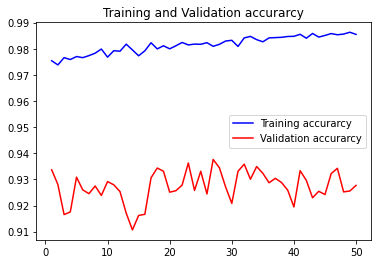

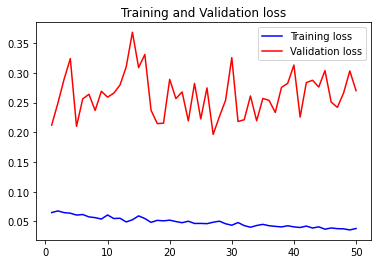

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:

# Install nightly package for some functionalities that aren't in alpha
!pip install tf-nightly-gpu-2.0-preview

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.4'

ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview


In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.13.2:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.13.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.13.2


In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
# model.save_weights

In [0]:
with open('model.json') as json_file:
    json_config = json_file.read()
new_model = tf.keras.models.model_from_json(json_config)
new_model.load_weights('/content/model.h5')
converter=tf.lite.TFLiteConverter.from_keras_model(new_model)

In [0]:
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

92391768